# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [22]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (8., 4.)})
sns.set_style('whitegrid')

import pandas as pd
np.random.seed(123)

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

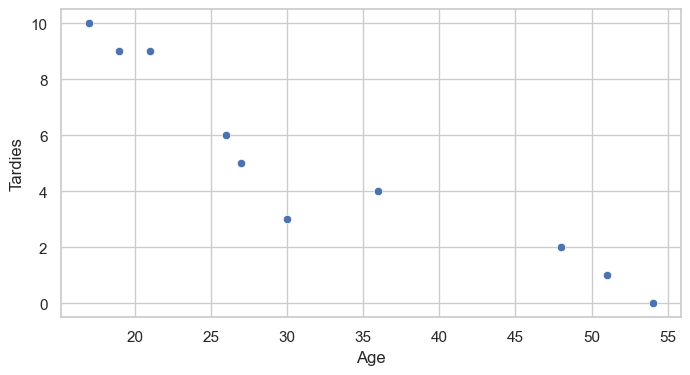

In [23]:
sns.scatterplot(data=student_data, x='Age', y='Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here.
print('There is a correlation between the age and the tardies, where the older a student is the less tardies they have.')

There is a correlation between the age and the tardies, where the older a student is the less tardies they have.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

--------
                         Age   Tardies  Prediction Tardies
Age                 1.000000 -0.939163           -1.000000
Tardies            -0.939163  1.000000            0.939163
Prediction Tardies -1.000000  0.939163            1.000000
We can observe that there is a negative correlation with a value close to -1, that means that when one of the variables increases, the other will decrease accordingly.
--------


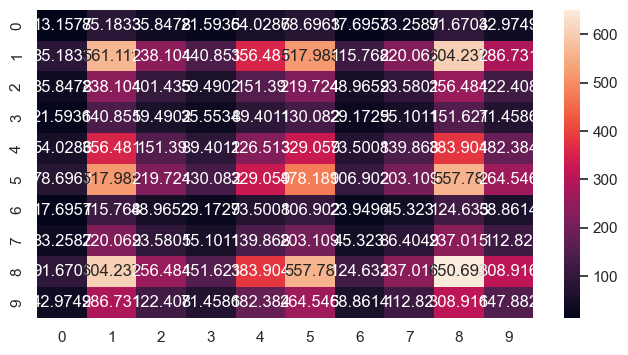

In [24]:
# Your response here.
corr = student_data.corr()
cova = np.cov(student_data)

print('--------')
print(corr)
print('We can observe that there is a negative correlation with a value close to -1, that means that when one of the variables increases, the other will decrease accordingly.')

print('--------')
cov_matrix = np.cov(student_data,bias=True)
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
x = student_data[["Age"]]
y = student_data[["Tardies"]]

model = LinearRegression().fit(x, y)
student_data['Prediction Tardies'] = model.predict(x)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8820265558250109


Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

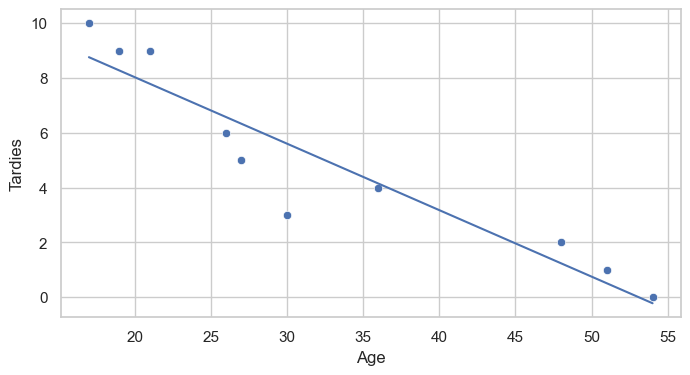

In [33]:
sns.scatterplot(data=student_data, x='Age', y='Tardies')
sns.lineplot(data=student_data, x='Age', y='Prediction Tardies')
#plt.plot(student_data.Age, student_data["Prediction Tardies"], color='g')


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
print('We can immediately observe that there is a negative correlation between the Age and Tardies. As people get older they are on time more times.')

We can immediately observe that there is a negative correlation between the Age and Tardies. As people get older they are on time more times.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your response here.
analysis = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
analysis.head()

corr_matrix = analysis.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [11]:
print('The least significant variable toward CO2 Emissions is the Year of the vehicle, with a negative correlation of -0.22.')

The least significant variable toward CO2 Emissions is the Year of the vehicle, with a negative correlation of -0.22.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here. 
x = analysis[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = analysis[["CO2 Emission Grams/Mile"]]

model = LinearRegression().fit(x, y)
analysis['Prediction'] = model.predict(x)

analysis.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_15156\3823993723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['Prediction'] = model.predict(x)


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile,Prediction
0,1984,4.0,19.388824,17,1950,522.764706,522.030384
1,1984,6.0,25.354615,13,2550,683.615385,671.001053
2,1985,4.0,20.600625,16,2100,555.437500,552.684951
3,1985,6.0,25.354615,13,2550,683.615385,670.680436
4,1987,6.0,20.600625,16,2550,555.437500,570.340582


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
s = "Prediction~ Year+Cylinders+analysis['Fuel Barrels/Year']+analysis['Combined MPG']+analysis['Fuel Cost/Year']+analysis['CO2 Emission Grams/Mile']"
results = smf.ols(s, data=analysis).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Prediction   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.080e+29
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:45:27   Log-Likelihood:             8.2288e+05
No. Observations:               35952   AIC:                        -1.646e+06
Df Residuals:                   35945   BIC:                        -1.646e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             769.8883   3.34e-11    2.3e+13      0.000     769.888     769.888
Year                                   -0.3206   1.66e-14  -1.93e+13      0.000      -0.321      -0.321
Cylinders                               1.8788   1.41e-13   1.33e+13      0.000       1.879       1.879
analysis['Fuel Barrels/Year']          19.0529   1.98e-13   9.61e+13      0.000      19.053      19.053
analysis['Combined MPG']               -3.0404   7.65e-14  -3.97e+13      0.000      -3.040      -3.040
analysis['Fuel Cost/Year']              0.0323   8.62e-16   3.75e+13      0.000       0.032       0.032
analysis['CO2 Emission Grams/Mile'] -7.517e-15   8.89e-15     -0.845      0.398    -2.5e-14    9.92e-15
==============================================================================
Omnibus:                      783.981   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1270.081
Skew:                           0.211   Prob(JB):                    1.60e-276
Kurtosis:                       3.818   Cond. No.                     6.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plotting the various Regression Lines:

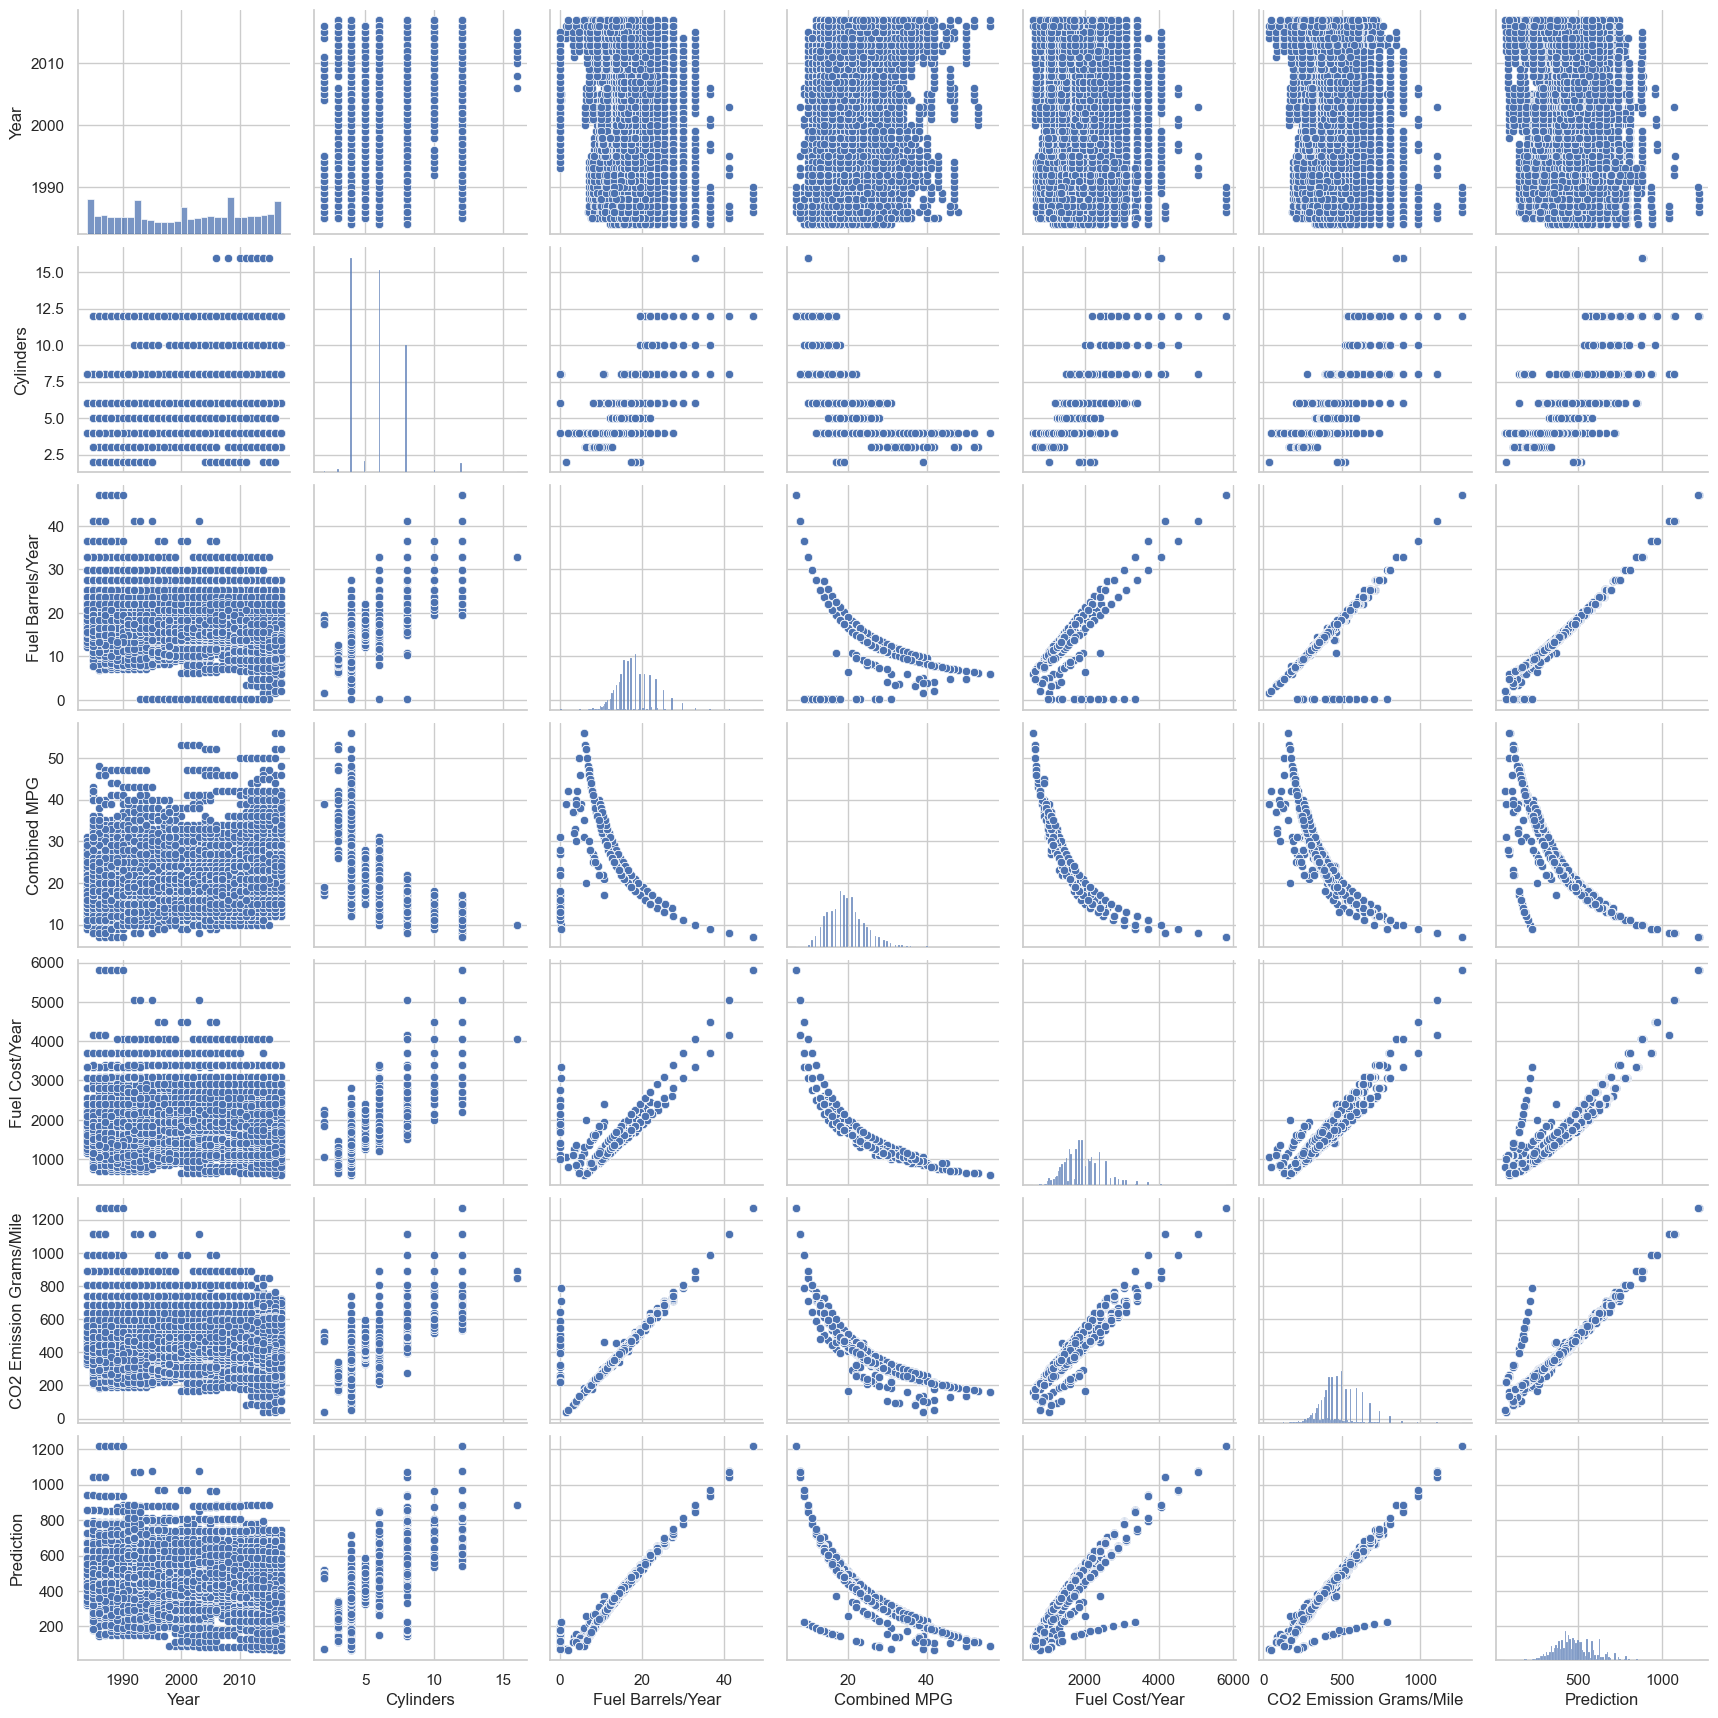

In [14]:
# Your response here. 
sns.pairplot(analysis)
plt.show()

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [15]:
# Your code here. 
party_invites = pd.DataFrame({'X': [1,3,4,6,7,8,11,14], 'Y': [1,2,4,4,5,7,8,13]})
party_invites

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,7,5
5,8,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [19]:
# Your code here.
X = party_invites[['X']]
Y = party_invites[['Y']]

model = LinearRegression().fit(X, Y)
party_invites['Prediction'] = model.predict(X)

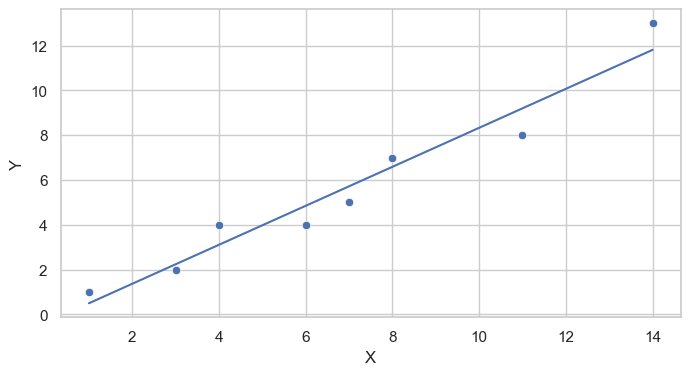

In [26]:
sns.scatterplot(data=party_invites, x='X', y='Y')
sns.lineplot(data=party_invites, x='X', y='Prediction')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [28]:
# Your response here. 
print("That there is a clear correlation between the number of people invited is directly proportional with the amount of people who can't make it.")

That there is a clear correlation between the number of people invited is directly proportional with the amount of people who can't make it.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 